## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Hierarchical Agglomerative Clustering - Demo 1

* Utilização dos algoritmos Single, Complete e Average Linkage.
* Base de dados sintéticas

In [4]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_blobs

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética

In [2]:
X, y = make_blobs(n_samples=30, centers=3, n_features=2,
                  random_state=2)

df = pd.DataFrame(X, columns=['x', 'y'])
df_with_label = df.copy()
df_with_label['label'] = y

df_with_label.head()

,x,y,label
0,-2.421779,-3.305593,2
1,0.355595,-2.481164,1
2,-2.027973,-9.472450,0
3,-1.299232,-8.306474,0
4,-0.874841,0.437633,1


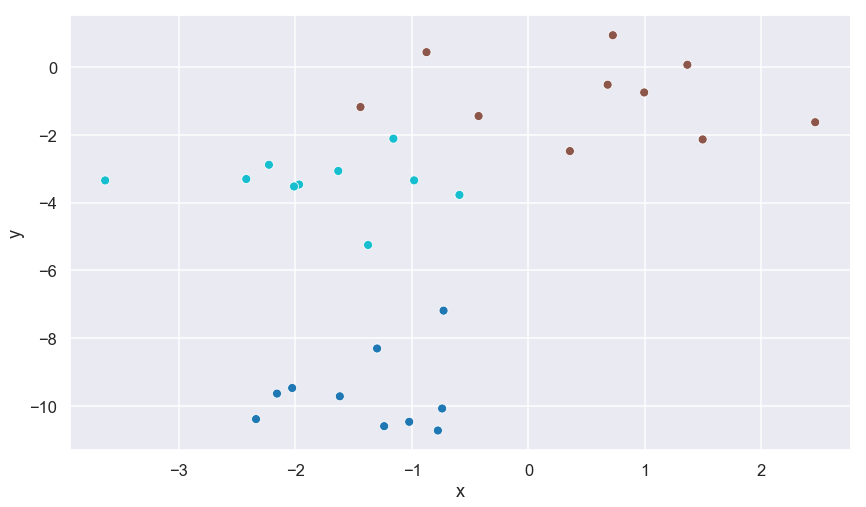

In [5]:
_ = sns.scatterplot(x='x', y='y', data=df_with_label, hue='label', palette='tab10', legend=False)

### Testar Hierarchical Clustering

In [6]:
linkage_matrix = linkage(df, method='single')
print(linkage_matrix[:10])

[[ 5.         12.          0.07247503  2.        ]
 [ 2.         27.          0.21056705  2.        ]
 [ 6.         18.          0.25083291  2.        ]
 [19.         32.          0.35562055  3.        ]
 [ 8.         21.          0.38804449  2.        ]
 [ 0.          9.          0.46345427  2.        ]
 [30.         35.          0.46515446  4.        ]
 [13.         31.          0.47691578  3.        ]
 [20.         33.          0.48368311  4.        ]
 [16.         36.          0.52282143  5.        ]]


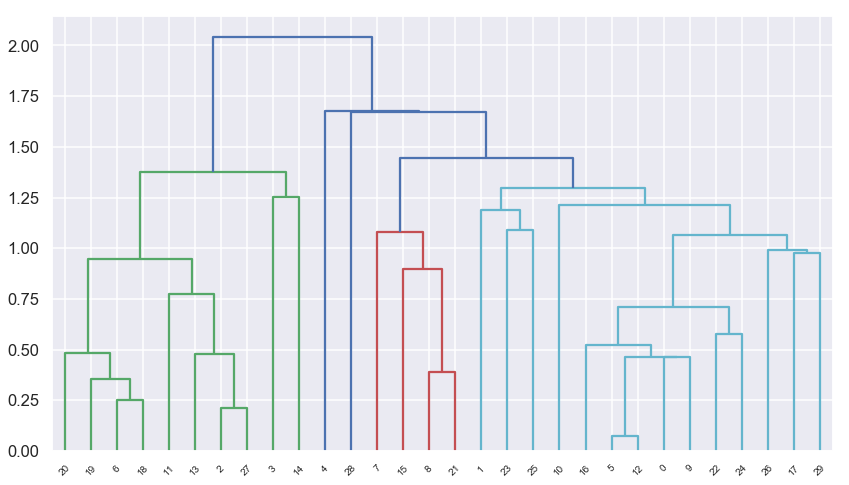

In [7]:
d = dendrogram(linkage_matrix)

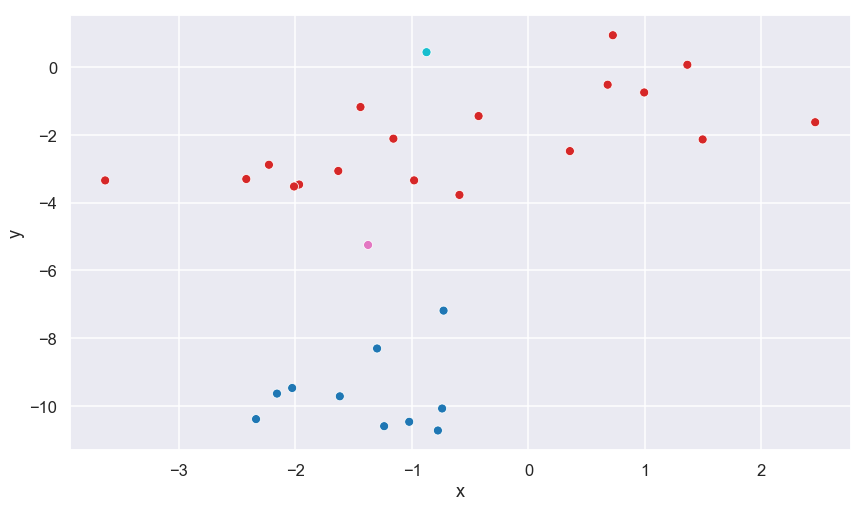

In [8]:
labels = fcluster(linkage_matrix, 1.6, 'distance')
df_with_label['cluster_labels'] = labels
_ = sns.scatterplot(x='x', y='y', data=df_with_label, hue='cluster_labels', palette='tab10', legend=False)

### Complete Linkage

In [12]:
linkage_matrix = linkage(df, method='complete')
print(linkage_matrix[:10])

[[ 5.         12.          0.07247503  2.        ]
 [ 2.         27.          0.21056705  2.        ]
 [ 6.         18.          0.25083291  2.        ]
 [ 8.         21.          0.38804449  2.        ]
 [ 0.          9.          0.46345427  2.        ]
 [19.         32.          0.47859973  3.        ]
 [13.         31.          0.54515076  3.        ]
 [22.         24.          0.5791681   2.        ]
 [16.         30.          0.59521066  3.        ]
 [20.         35.          0.720947    4.        ]]


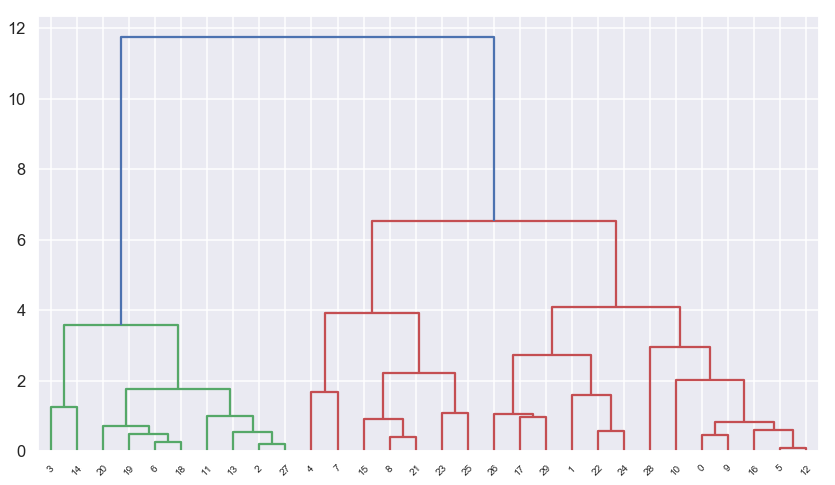

In [13]:
d = dendrogram(linkage_matrix)

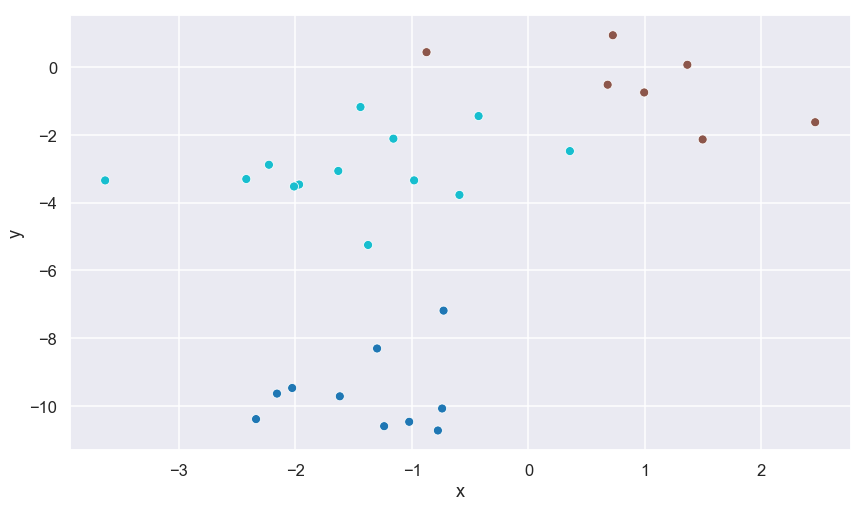

In [14]:
labels = fcluster(linkage_matrix, 5.0, 'distance')
df_with_label['cluster_labels'] = labels
_ = sns.scatterplot(x='x', y='y', data=df_with_label, hue='cluster_labels', palette='tab10', legend=False)

### Average Linkage

In [16]:
linkage_matrix = linkage(df, method='average')
print(linkage_matrix[:10])

[[ 5.         12.          0.07247503  2.        ]
 [ 2.         27.          0.21056705  2.        ]
 [ 6.         18.          0.25083291  2.        ]
 [ 8.         21.          0.38804449  2.        ]
 [19.         32.          0.41711014  3.        ]
 [ 0.          9.          0.46345427  2.        ]
 [13.         31.          0.51103327  3.        ]
 [16.         30.          0.55901604  3.        ]
 [22.         24.          0.5791681   2.        ]
 [35.         37.          0.61794964  5.        ]]


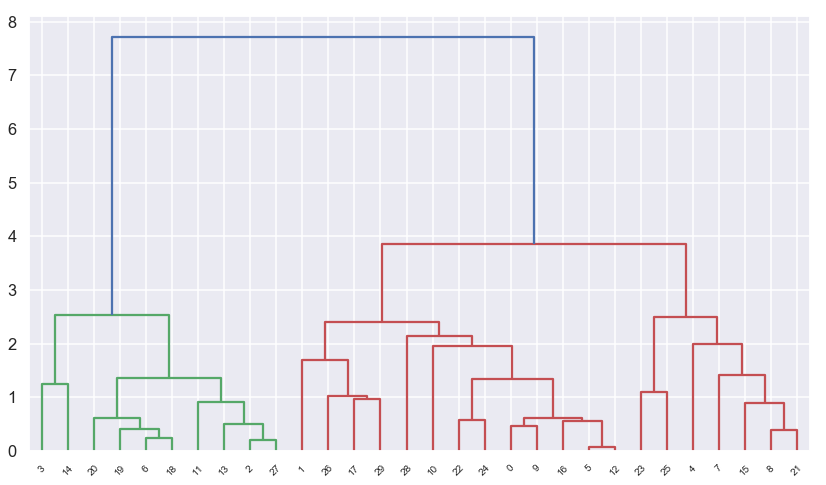

In [17]:
d = dendrogram(linkage_matrix)

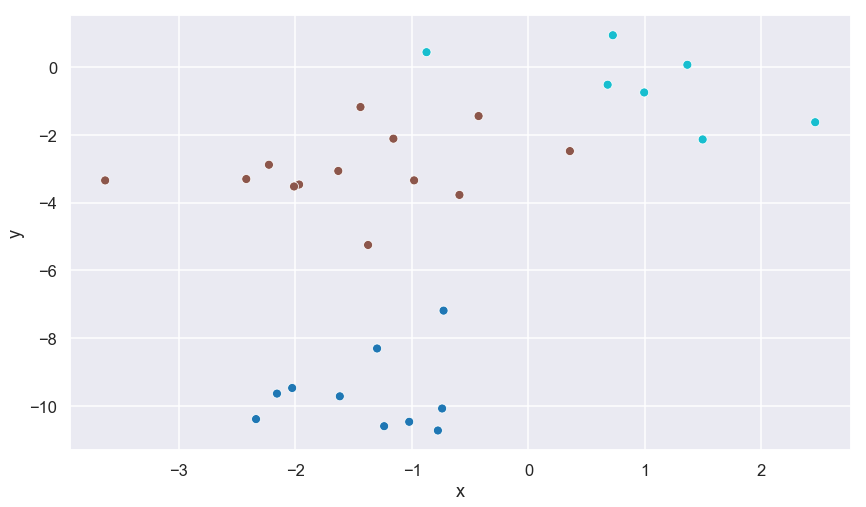

In [18]:
labels = fcluster(linkage_matrix, 3.5, 'distance')
df_with_label['cluster_labels'] = labels
_ = sns.scatterplot(x='x', y='y', data=df_with_label, hue='cluster_labels', palette='tab10', legend=False)